<a href="https://colab.research.google.com/github/bhattronak1/ML-Tensorflow-project/blob/main/Fish_Market_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import tensorflow as tf
import pathlib
import pandas as pd
from tensorflow import keras
import seaborn as sns
from tensorflow.keras import layers
print("Import Completed")

Import Completed


In [72]:
dataset_path= "https://raw.githubusercontent.com/bhattronak1/ML-Tensorflow-project/main/Fish.csv"
dataset_path

'https://raw.githubusercontent.com/bhattronak1/ML-Tensorflow-project/main/Fish.csv'

In [73]:
dataset = pd.read_csv(dataset_path)
dataset.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [74]:
dataset['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [75]:
species= dataset.pop('Species')

In [76]:
dataset['Perch'] = (species=='Perch') * 1.0
dataset['Bream'] = (species=='Bream') * 1.0
dataset['Roach'] = (species=='Roach') * 1.0
dataset['Pike'] = (species=='Pike') * 1.0
dataset['Smelt'] = (species=='Smelt') * 1.0
dataset['Parkki'] = (species=='Parkki') * 1.0
dataset['Whitefish'] = (species=='Whitefish') * 1.0

In [77]:
train_dataset= dataset.sample(frac=0.8, random_state=0)
test_dataset= dataset.drop(train_dataset.index)
train_dataset.tail()

,Weight,Length1,Length2,Length3,Height,Width,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
152,9.9,11.3,11.8,13.1,2.2139,1.1659,0.0,0.0,0.0,0.0,1.0,0.0,0.0
124,1000.0,39.8,43.0,45.2,11.9328,7.2772,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34,950.0,38.0,41.0,46.5,17.6235,6.3705,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28,850.0,32.8,36.0,41.6,16.8896,6.1984,0.0,1.0,0.0,0.0,0.0,0.0,0.0


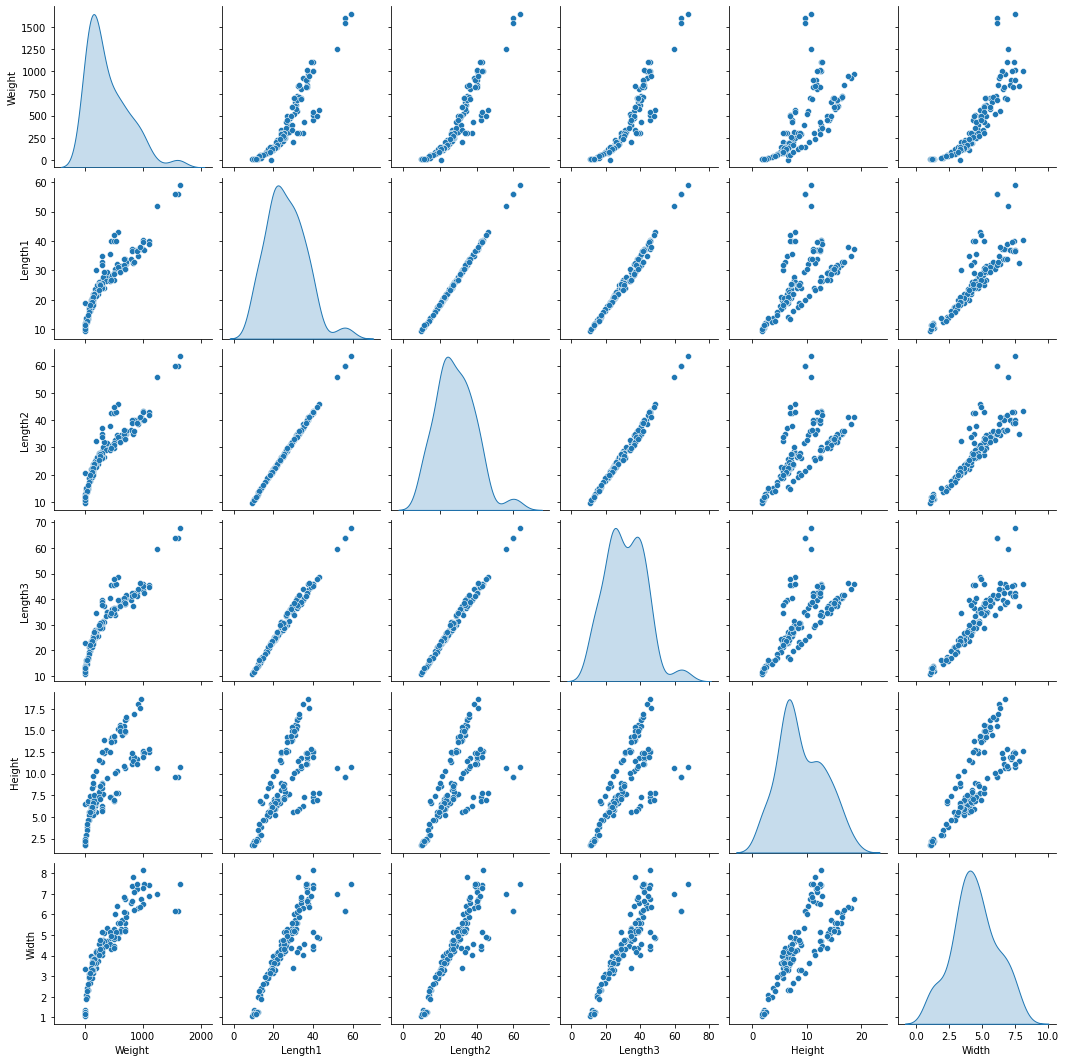

In [78]:
sns.pairplot(train_dataset[['Weight','Length1','Length2','Length3','Height','Width']],diag_kind='kde')

In [79]:
train_stat= train_dataset.describe()
train_stat.pop('Weight')
train_stat= train_stat.transpose()
train_stat

,count,mean,std,min,25%,50%,75%,max
Length1,127.0,26.384252,9.931427,9.3000,19.60000,25.4000,32.25000,59.0000
Length2,127.0,28.556693,10.648329,9.8000,21.40000,27.5000,35.00000,63.4000
Length3,127.0,31.405512,11.498408,10.8000,23.50000,30.1000,39.55000,68.0000
Height,127.0,8.999738,4.138348,1.7284,6.11230,7.7920,12.37930,18.6354
Width,127.0,4.432350,1.670181,1.0476,3.38565,4.3225,5.46225,8.1420
Perch,127.0,0.338583,0.475102,0.0000,0.00000,0.0000,1.00000,1.0000
Bream,127.0,0.228346,0.421429,0.0000,0.00000,0.0000,0.00000,1.0000
Roach,127.0,0.133858,0.341848,0.0000,0.00000,0.0000,0.00000,1.0000
Pike,127.0,0.110236,0.314424,0.0000,0.00000,0.0000,0.00000,1.0000
Smelt,127.0,0.086614,0.282383,0.0000,0.00000,0.0000,0.00000,1.0000


In [80]:
train_label= train_dataset.pop('Weight')
test_label= test_dataset.pop('Weight')

In [81]:
def norm(x):
  return (x-train_stat['mean'])/train_stat['std']

norm_train_dataset=norm(train_dataset)
norm_test_dataset=norm(test_dataset)

In [82]:
def build_model():

  model=keras.Sequential([
         layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
         layers.Dense(64, activation=tf.nn.relu),
         layers.Dense(1)        
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])

  return model

In [83]:
model=build_model()

In [84]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS=1000

history=model.fit(norm_train_dataset, train_label, epochs= EPOCHS, validation_split=0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [85]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2044.134155,27.963634,2044.134155,1958.640381,33.429253,1958.640381,995
996,2008.990967,28.119511,2008.990967,2148.884766,35.480038,2148.884766,996
997,2066.282471,28.027973,2066.282471,2112.227051,35.032829,2112.227051,997
998,2000.136597,27.989016,2000.136597,2105.564941,34.976398,2105.564941,998
999,2018.610107,27.953308,2018.610107,2111.566406,35.129009,2111.566406,999


In [91]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel(' MAE [Weight]')

  plt.plot(hist['epoch'], hist['mae'], label='Train error')

  plt.plot(hist['epoch'], hist['val_mae'], label=' Val error')

  plt.legend()
  plt.ylim([0,500])

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel(' MSE [Weight]')

  plt.plot(hist['epoch'], hist['mse'], label='Train error')

  plt.plot(hist['epoch'], hist['val_mse'], label=' Val error')

  plt.legend()
  plt.ylim([0,10000])

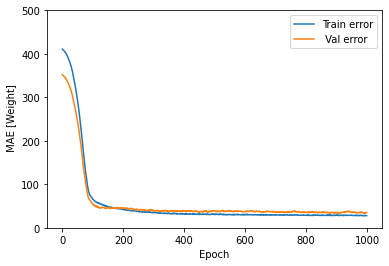

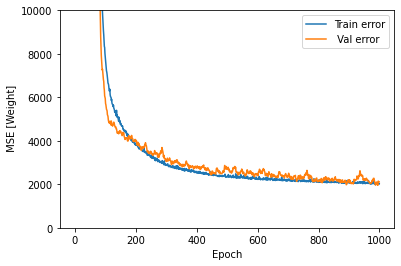

In [92]:
plot_history(history)

In [88]:
loss, mae, mse = model.evaluate(norm_test_dataset, test_label, verbose=0)
print("Testing set Mean Abs Erros: {:5.2f} Weight".format(mae))

Testing set Mean Abs Erros: 32.02 Weight


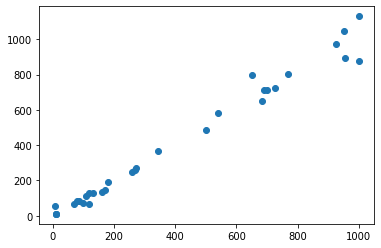

In [89]:
test_predictions= model.predict(norm_test_dataset).flatten()
plt.scatter(test_label, test_predictions)

(array([ 1.,  0.,  2.,  4., 14.,  5.,  3.,  0.,  1.,  2.]),
 array([-121.8449707 ,  -95.16376343,  -68.48255615,  -41.80134888,
         -15.1201416 ,   11.56106567,   38.24227295,   64.92348022,
          91.6046875 ,  118.28589478,  144.96710205]),
 <a list of 10 Patch objects>)

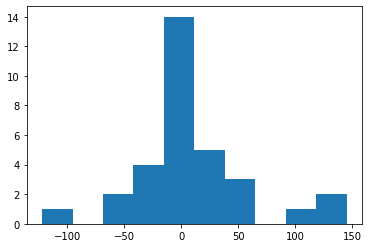

In [90]:
error= test_predictions - test_label
plt.hist(error)